In [1]:
import pandas as pd
import sqlite3
import seaborn as sns
connection = sqlite3.connect('data/jobs.db')

In [2]:
df = pd.read_sql("""
    SELECT
        *
    FROM
        jobs    """,con=connection)
df

,job_id,job_role,job_role_ext,post_title,post_url,company_name,company_url,country,location,job_type,salary,scrape_date,posted,info_remote,post_language,description
0,4cee71852246cd98,de,data engineer,Data Engineer (Remote),https://www.indeed.com/viewjob?jk=4cee71852246...,Collins Aerospace,https://www.indeed.com/cmp/Collins-Aerospace?c...,us,"Charlotte, NC",Full-time,None,2022-04-23,Posted Just posted,"Collins Aerospace - 3,129 reviews - Charlotte,...",en,\n\n\nCollins Aerospace is continuing to grow ...
1,245d0d6e3a8680e5,de,data engineer,Senior Staff Data Engineer - 100% Remote,https://www.indeed.com/viewjob?jk=245d0d6e3a86...,Stryker,https://www.indeed.com/cmp/Stryker-3?campaigni...,us,Illinois,None,None,2022-04-23,Posted today,"Stryker - 1,808 reviews - Illinois - Remote",en,Why join Stryker?\n\nWe are proud to be named ...
2,76031179131b0858,de,data engineer,SAP Data Engineer (Remote),https://www.indeed.com/viewjob?jk=76031179131b...,Collins Aerospace,https://www.indeed.com/cmp/Collins-Aerospace?c...,us,"Charlotte, NC",Full-time,None,2022-04-23,Posted Just posted,"Collins Aerospace - 3,129 reviews - Charlotte,...",en,\n\nCollins Aerospace is continuing to grow ou...
3,04f7fde92feb9b76,de,data engineer,Azure Data Engineer,https://www.indeed.com/viewjob?jk=04f7fde92feb...,The Coca-Cola Company,https://www.indeed.com/cmp/The-Coca--cola-Comp...,us,"Atlanta, GA 30313",Full-time,None,2022-04-23,Posted Just posted,"The Coca-Cola Company - 9,868 reviews - Atlant...",en,\n\n...\n Our Purpose and Growth Culture: We a...
4,a3510f5979c22922,de,data engineer,Lead Data Engineer - High Performance Computin...,https://www.indeed.com/viewjob?jk=a3510f5979c2...,TARGET,https://www.indeed.com/cmp/Target?campaignid=m...,us,"Sunnyvale, CA 94086",Full-time,None,2022-04-23,Posted today,"TARGET - 59,853 reviews - Sunnyvale, CA 94086 ...",en,\n\nAbout us:\n As a Fortune 50 company with m...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10352,8f602bebc4598b0d,ds,data scientist,Data Scientist(Fraud Detection),https://www.indeed.com/viewjob?jk=8f602bebc459...,ROADGET BUSINESS PTE. LTD.,https://www.indeed.com/cmp/Roadget-Business-Pt...,sg,Singapore,Full-time,None,2022-05-08,Posted 1 day ago,ROADGET BUSINESS PTE. LTD. - Singapore,en,\n\nJob Description: \nResponsible for develop...
10353,b1e2f17ec9b311ff,ds,data scientist,Senior Data Scientist(Fraud Detection),https://www.indeed.com/viewjob?jk=b1e2f17ec9b3...,ROADGET BUSINESS PTE. LTD.,https://www.indeed.com/cmp/Roadget-Business-Pt...,sg,Singapore,Full-time,None,2022-05-08,Posted 1 day ago,ROADGET BUSINESS PTE. LTD. - Singapore,en,\n\nJob Description: \nResponsible for develop...
10354,40301ceb1a20b7e0,ds,data scientist,Data Scientist and Analytic Consultant,https://www.indeed.com/viewjob?jk=40301ceb1a20...,Advanced Info Service Plc.,https://www.indeed.com/cmp/Advanced-Info-Servi...,th,กรุงเทพมหานคร,None,None,2022-05-08,Posted 1 day ago,Advanced Info Service Plc. - กรุงเทพมหานคร,en,Understanding of business problems for gatheri...
10355,a7f8ad86d7185999,ds,data scientist,Data Scientist,https://www.indeed.com/viewjob?jk=a7f8ad86d718...,AMK Solutions Pvt Ltd,https://www.indeed.com/cmp/Amk-Solutions-Pvt-L...,my,Kuala Lumpur,"Full-time, Contract",None,2022-05-08,Posted today,AMK Solutions Pvt Ltd - Kuala Lumpur,en,\nAMK Technology looking for a sharp professio...


In [3]:
from wordcloud import WordCloud
import numpy as np
from PIL import Image

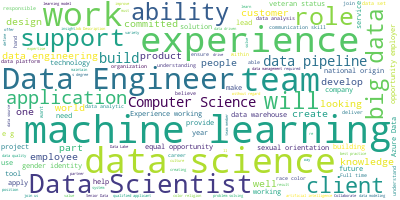

In [4]:
df = pd.read_sql("SELECT description FROM jobs",con=connection)
text_list = []
for index,row in df.iterrows():
    text_list.append(df.loc[index,'description'])
text = ' '.join(text_list)
wc = WordCloud(background_color="white").generate(text)

image = wc.to_image()
image

,company_name,posts
0,IBM,646
1,Comcentric,316
2,Deloitte,312
3,KPMG,204
4,BairesDev,110
5,EY,101
6,"JPMorgan Chase Bank, N.A.",95
7,Amazon.com Services LLC,86
8,General Motors,74
9,Accenture,62


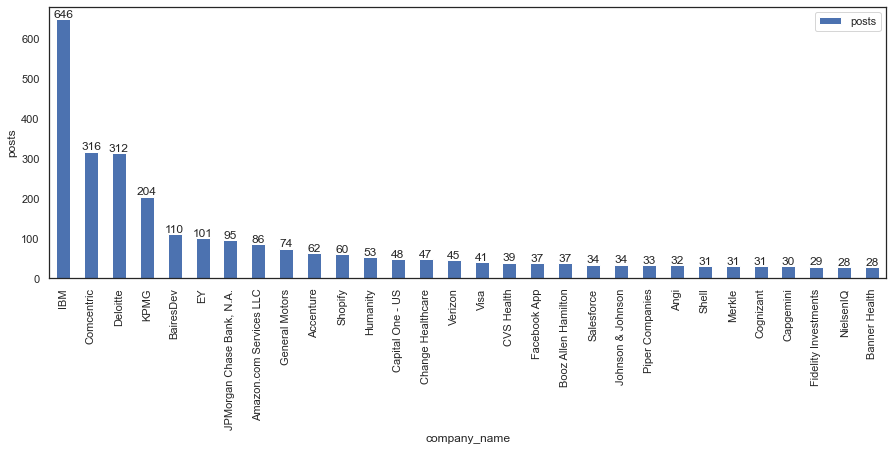

In [5]:
df = pd.read_sql("""
    SELECT
        company_name,
        COUNT(*) AS posts
    FROM
        jobs
    GROUP BY
        company_name
    ORDER BY
        COUNT(*) desc
    LIMIT
        30    """,con=connection)
sns.set_theme('notebook')
sns.set_style('white')
ax = df.plot(kind='bar', x='company_name', ylabel='posts', figsize=(15,5))
for container in ax.containers:
    ax.bar_label(container)
df

,de_posts,ds_posts
0,6149,4208


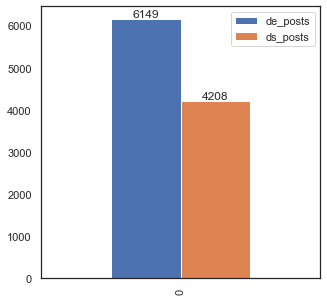

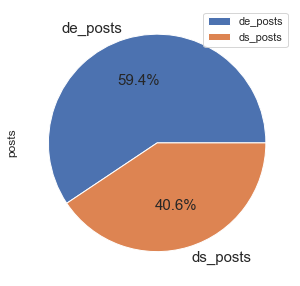

In [6]:
df = pd.read_sql("""
    SELECT
        SUM(CASE WHEN job_role='de' THEN 1 ELSE 0 END) AS de_posts,
        SUM(CASE WHEN job_role='ds' THEN 1 ELSE 0 END) AS ds_posts
    FROM
        jobs    """,con=connection)

sns.set_theme('notebook')
sns.set_style('white')

ax = df.plot(kind='bar', figsize=(5,5)) # use ax to then plot values
for container in ax.containers:
    ax.bar_label(container)
df[['de_posts','ds_posts']].T.plot(kind='pie', y=0, ylabel='posts', autopct='%1.1f%%', figsize=(5,5), fontsize=15) # Transpose and plot
df

,country,total_posts,de_posts,ds_posts
0,us,4459,2332,2127
1,in,1598,1157,441
2,uk,585,366,219
3,de,548,319,229
4,fr,392,199,193
5,ca,372,223,149
6,sg,199,98,101
7,au,191,148,43
8,nl,178,110,68
9,pl,167,116,51


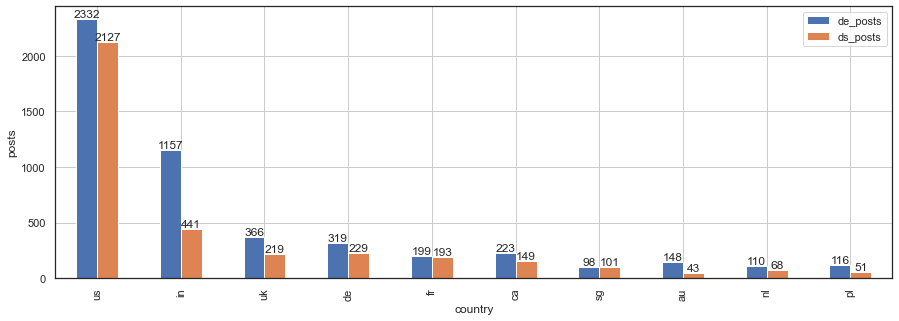

In [7]:
df = pd.read_sql("""
    SELECT
        country,
        COUNT(*) AS total_posts,
        SUM(CASE WHEN job_role='de' THEN 1 ELSE 0 END) AS de_posts,
        SUM(CASE WHEN job_role='ds' THEN 1 ELSE 0 END) AS ds_posts
    FROM
        jobs
    GROUP BY
        country
    ORDER BY
        count(*) DESC
    LIMIT
        10   """,con=connection)
sns.set_theme('notebook')
sns.set_style('white')
ax = df[['country','de_posts','ds_posts']].plot(kind='bar', x='country', figsize=(15,5), ylabel='posts', grid=True)
for container in ax.containers:
    ax.bar_label(container)
df

In [8]:
df = pd.read_sql("""
    SELECT
        scrape_date,
        COUNT(*)
    FROM
        jobs
    GROUP BY
        scrape_date
    ORDER BY
        scrape_date DESC   """,con=connection)
df

,scrape_date,COUNT(*)
0,2022-05-08,394
1,2022-05-07,854
2,2022-05-06,863
3,2022-05-05,981
4,2022-05-04,860
5,2022-05-03,732
6,2022-05-02,237
7,2022-05-01,326
8,2022-04-30,692
9,2022-04-29,875


job_role_ext,data engineer,data scientist
sql_percentage,74.2,59.2
python_percentage,67.7,84.5
cloud_percentage,61.2,37.7
stat_percentage,55.8,85.8
scala_percentage,44.8,24.4
spark_percentage,44.5,27.4
aws_percentage,41.7,28.4
azure_percentage,34.8,20.8
java_percentage,30.6,18.3
ml_percentage,18.3,75.1


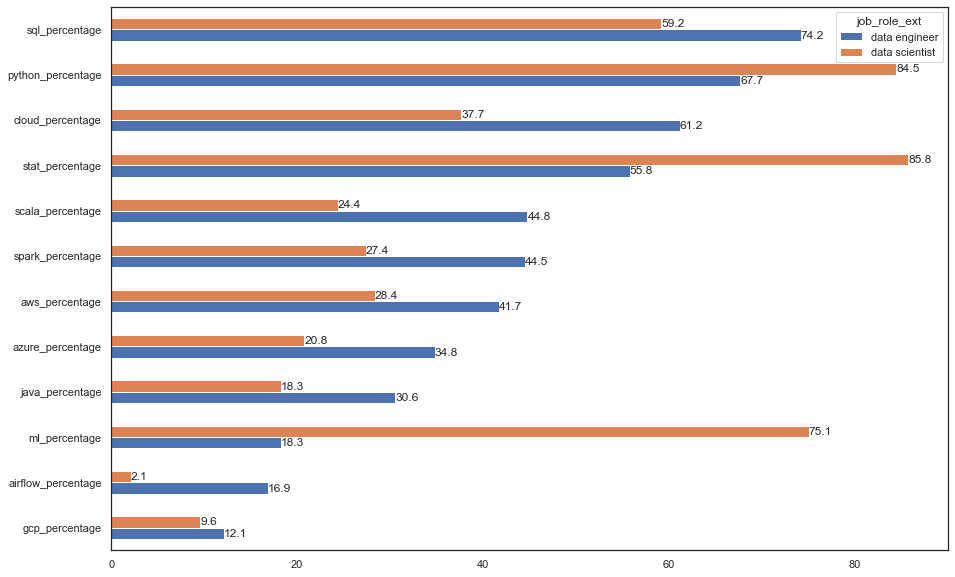

In [9]:
df = pd.read_sql("""
    SELECT
        job_role_ext,
        ROUND(SUM(CASE
            WHEN UPPER(description) LIKE '%SQL%' THEN 1
            ELSE 0
            END) / CAST(COUNT(*) AS float)*100, 1) AS sql_percentage,
        ROUND(SUM(CASE
            WHEN UPPER(description) LIKE '%PYTHON%' THEN 1
            ELSE 0
            END) / CAST(COUNT(*) AS float)*100, 1) AS python_percentage,
        ROUND(SUM(CASE
            WHEN UPPER(description) LIKE '%AIRFLOW%' THEN 1
            ELSE 0
            END) / CAST(COUNT(*) AS float)*100, 1) AS airflow_percentage,
        ROUND(SUM(CASE
            WHEN UPPER(description) LIKE '%AWS%' OR
            UPPER(description) LIKE '%GCP%' OR 
            UPPER(description) LIKE '%AZURE%' THEN 1
            ELSE 0
            END) / CAST(COUNT(*) AS float)*100, 1) AS cloud_percentage,
        ROUND(SUM(CASE
            WHEN UPPER(description) LIKE '%SPARK%' THEN 1
            ELSE 0
            END) / CAST(COUNT(*) AS float)*100, 1) AS spark_percentage,
        ROUND(SUM(CASE
            WHEN UPPER(description) LIKE '%MACHINE LEARNING%' THEN 1
            ELSE 0
            END) / CAST(COUNT(*) AS float)*100, 1) AS ml_percentage,
        ROUND(SUM(CASE
            WHEN UPPER(description) LIKE '%STAT%' THEN 1
            ELSE 0
            END) / CAST(COUNT(*) AS float)*100, 1) AS stat_percentage,
        ROUND(SUM(CASE
            WHEN UPPER(description) LIKE '%SCALA%' THEN 1
            ELSE 0
            END) / CAST(COUNT(*) AS float)*100, 1) AS scala_percentage,
        ROUND(SUM(CASE
            WHEN UPPER(description) LIKE '%JAVA%' THEN 1
            ELSE 0
            END) / CAST(COUNT(*) AS float)*100, 1) AS java_percentage,
        ROUND(SUM(CASE
            WHEN UPPER(description) LIKE '%AWS%' THEN 1
            ELSE 0
            END) / CAST(COUNT(*) AS float)*100, 1) AS aws_percentage,
        ROUND(SUM(CASE
            WHEN UPPER(description) LIKE '%GCP%' THEN 1
            ELSE 0
            END) / CAST(COUNT(*) AS float)*100, 1) AS gcp_percentage,
        ROUND(SUM(CASE
            WHEN UPPER(description) LIKE '%AZURE%' THEN 1
            ELSE 0
            END) / CAST(COUNT(*) AS float)*100, 1) AS azure_percentage
    FROM
        jobs
    GROUP BY
        job_role_ext
    ORDER BY
        2 DESC
    LIMIT
        10   """,con=connection)
sns.set_theme('notebook')
sns.set_style('white')
df = df.set_index('job_role_ext').T.sort_values(by=['data engineer'], ascending=False) # Transpose to graph better
ax = df.sort_values(by=['data engineer']).plot(kind='barh', figsize=(15,10)) # sort back and print
for container in ax.containers:
    ax.bar_label(container)
df

In [10]:
connection.close()

wordcloud!!! and graphs. world map